In [1]:
# project: p2
# submitter: xyang467
# partner: none
# hours: 10

In [2]:
import loans
import numpy as np
from time import time
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '16'

In [3]:
#Q1
Bank = loans.Bank("First Home Bank")
n = len(Bank)
avg = []
for i in range(n):
    if Bank[i].interest_rate != -1.0:
        avg.append(Bank[i].interest_rate) 
np.mean(avg)

2.962962962962963

In [4]:
#Q2
app_avg = []
for i in range(n):
    app_avg.append(len(Bank[i].applicants))
np.mean(app_avg)   

1.5777777777777777

In [5]:
#Q3
age = []
for i in range(n):
    for x in range(len(Bank[i].applicants)):
        age.append(Bank[i].applicants[x].age)
age_d = dict()
for i in age:
    age_d[i] = age.count(i)
age_d 

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [6]:
#Q4
import search
tree = search.BST()
for i in range(n):
    tree.add(Bank[i].interest_rate,Bank[i])
len(tree[-1])

18

In [7]:
#Q5
def height(self):
    if self.left != None:
        left_height = height(self.left)
    else:
        left_height = 0
    if self.right != None:
        right_height = height(self.right)
    else:
        right_height = 0
    return max(left_height, right_height) + 1
height(tree.root)

9

In [8]:
Bank = loans.Bank("University of Wisconsin Credit Union")
n = len(Bank)

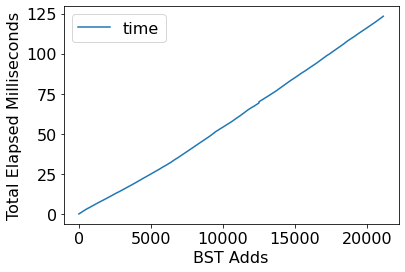

In [9]:
#Q6
times_df = pd.DataFrame(dtype=float)
tree = search.BST()
t = 0
for i in range(n):
    t0 = time()
    tree.add(Bank[i].interest_rate,Bank[i])
    t1 = time()
    t += t1 - t0
    times_df.loc[i,"time"] = t * 1000
times_df.plot.line()
plt.ylabel('Total Elapsed Milliseconds')
plt.xlabel('BST Adds')
plt.show()

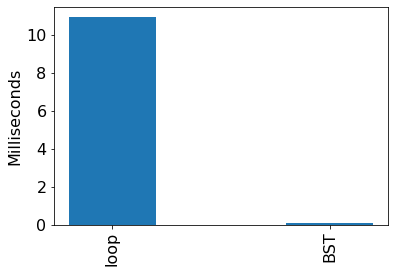

In [10]:
#Q7
t0 = time()
count = 0
for i in range(n):
    if Bank[i].interest_rate != -1.0:
        count += 1
t1 = time()
t2 = time()
len(tree[-1])
t3 = time()
plt.bar(["loop","BST"], [(t1-t0)*1000,(t3-t2)*1000],width = 0.4)
plt.ylabel('Milliseconds')
plt.xticks(rotation = 90)
plt.show()

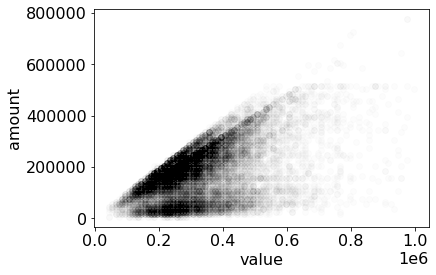

In [11]:
#Q8
value = []
amount = []
for i in range(n):
    if (Bank[i].property_value == -1) | (Bank[i].loan_amount == -1) | (Bank[i].interest_rate == -1):
        continue
    elif Bank[i].property_value <= 1000000:
        value.append(Bank[i].property_value)
        amount.append(Bank[i].loan_amount)
plt.scatter(value,amount,alpha = 0.01, color = "black")
plt.xlabel("value")
plt.ylabel("amount")
plt.show()

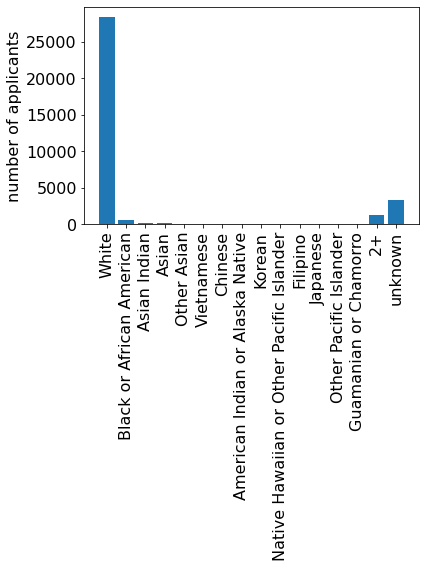

In [12]:
#Q9
unknown = 0
multiple = 0
race_name = []
race_count = []
race = []
for i in range(n):
    for x in range(len(Bank[i].applicants)):
        if len(Bank[i].applicants[x].race) == 0:
            unknown +=1
        elif len(Bank[i].applicants[x].race) >= 2:
            multiple +=1
        elif len(Bank[i].applicants[x].race) == 1:
            race.append(list(Bank[i].applicants[x].race)[0])
for r in race:
    if r not in race_name:
        race_name.append(r)
        race_count.append(race.count(r))
race_name.append("2+")
race_name.append("unknown")
race_count.append(multiple)
race_count.append(unknown)
plt.bar(race_name, race_count)
plt.ylabel('number of applicants')
plt.xticks(rotation = 90)
plt.show()

In [13]:
#Q10
def count(self):
    if self.left != None:
        left_count = count(self.left)
    else:
        left_count = 0
        
    if self.right != None:
        right_count = count(self.right)
    else: 
        right_count = 0
    return left_count+right_count+1
count(tree.root)

32